# Análise de Features com Mutual Information 🧠

Este notebook demonstra como usar a classe **FeatureAnalyzer** para analisar a importância das features do dataset SVM utilizando **Mutual Information**.

## 🎯 Objetivos:
- Carregar e preparar o dataset SVM
- Realizar análise de Mutual Information das features
- Configurar e testar diferentes thresholds
- Visualizar rankings e distribuições das features
- Selecionar as features mais relevantes
- Integrar com DatasetManager para workflow completo

## 1. Importar Bibliotecas e Configurações 📚

In [26]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Adicionar diretório scripts ao path
sys.path.append('./scripts')

print("✅ Bibliotecas importadas com sucesso!")
print(f"📁 Diretório atual: {os.getcwd()}")

# Verificar arquivos disponíveis
print(f"\n🔍 Arquivos disponíveis:")
if os.path.exists('./datasets'):
    for arquivo in os.listdir('./datasets'):
        if arquivo.endswith('.csv'):
            print(f"   📊 {arquivo}")
if os.path.exists('./scripts'):
    for arquivo in os.listdir('./scripts'):
        if arquivo.endswith('.py'):
            print(f"   🐍 {arquivo}")

✅ Bibliotecas importadas com sucesso!
📁 Diretório atual: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justiça\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon_v2\scripts

🔍 Arquivos disponíveis:


## 2. Importar Classes Personalizadas 🔧

In [27]:
# Importar classes personalizadas
from feature_analyzer import FeatureAnalyzer
from dataset_manager import DatasetManager

print("✅ Classes personalizadas importadas:")
print("   🧠 FeatureAnalyzer - para análise de mutual information")
print("   📊 DatasetManager - para gerenciamento de datasets")

✅ Classes personalizadas importadas:
   🧠 FeatureAnalyzer - para análise de mutual information
   📊 DatasetManager - para gerenciamento de datasets


## 3. Carregar Dataset SVM 📂

In [28]:
# Carregar dataset SVM usando DatasetManager
#dm = DatasetManager('svm')
#arquivo_csv = '../datasets/svm.csv'

dm = DatasetManager('svm')
arquivo_csv = '../datasets/svm.csv'



# Configurações para carregamento
target_column = 'target'
colunas_excluir = ['os_timestamp', 'node_name', 'iteration']

# Carregar dados
try:
    dataset = dm.carregar_dados_csv(
        arquivo_csv=arquivo_csv,
        target_column=target_column,
        colunas_excluir=colunas_excluir,
        test_size=0.6,
        val_size=0.5,
        random_state=42
    )VM
    
    
    print("\n✅ Dataset SVM carregado com sucesso!")
    
    # Informações básicas do dataset
    print(f"\n📊 Informações do Dataset:")
    print(f"   • X_train shape: {dataset['X_train'].shape}")
    print(f"   • Número de features: {len(dataset['features'])}")
    print(f"   • Classes únicas: {np.unique(dataset['y_train'])}")
    print(f"   • Distribuição das classes no treino:")
    
    unique, counts = np.unique(dataset['y_train'], return_counts=True)
    for classe, count in zip(unique, counts):
        print(f"     Classe {classe}: {count:,} ({count/len(dataset['y_train'])*100:.1f}%)")

except Exception as e:
    print(f"❌ Erro ao carregar dataset: {e}")
    # Examinar o arquivo diretamente
    print("\n📋 Examinando arquivo CSV...")
    df_temp = pd.read_csv(arquivo_csv)
    print(f"   • Shape: {df_temp.shape}")
    print(f"   • Colunas: {list(df_temp.columns)}")
    print(f"   • Primeiras linhas:")
    print(df_temp.head())

🔧 Carregando dados do arquivo: ../datasets/svm.csv
📊 Informações do dataset:
   • Total de registros: 80,648
   • Total de features: 122
   • Colunas excluídas: ['os_timestamp', 'node_name', 'iteration', 'target']
   • Target codificado: {'interf': np.int64(0), 'normal': np.int64(1)}

✅ Dados preparados:
   • X_train shape: (32259, 122)
   • X_val shape: (24195, 122)
   • X_test shape: (24194, 122)
   • Classes únicas: [0 1]

✅ Dataset SVM carregado com sucesso!

📊 Informações do Dataset:
   • X_train shape: (32259, 122)
   • Número de features: 122
   • Classes únicas: [0 1]
   • Distribuição das classes no treino:
     Classe 0: 18,264 (56.6%)
     Classe 1: 13,995 (43.4%)


## 4. Criar Analisador de Features 🧠

🧠 Calculando Mutual Information...
   • Tipo de problema detectado: classification
   • Número de features: 122
   • Número de amostras: 32259
   ✅ Análise concluída:
   • Média MI: 0.0731
   • Threshold percentil 50.0%: 0.0080
   • Features selecionadas (combinado): 59


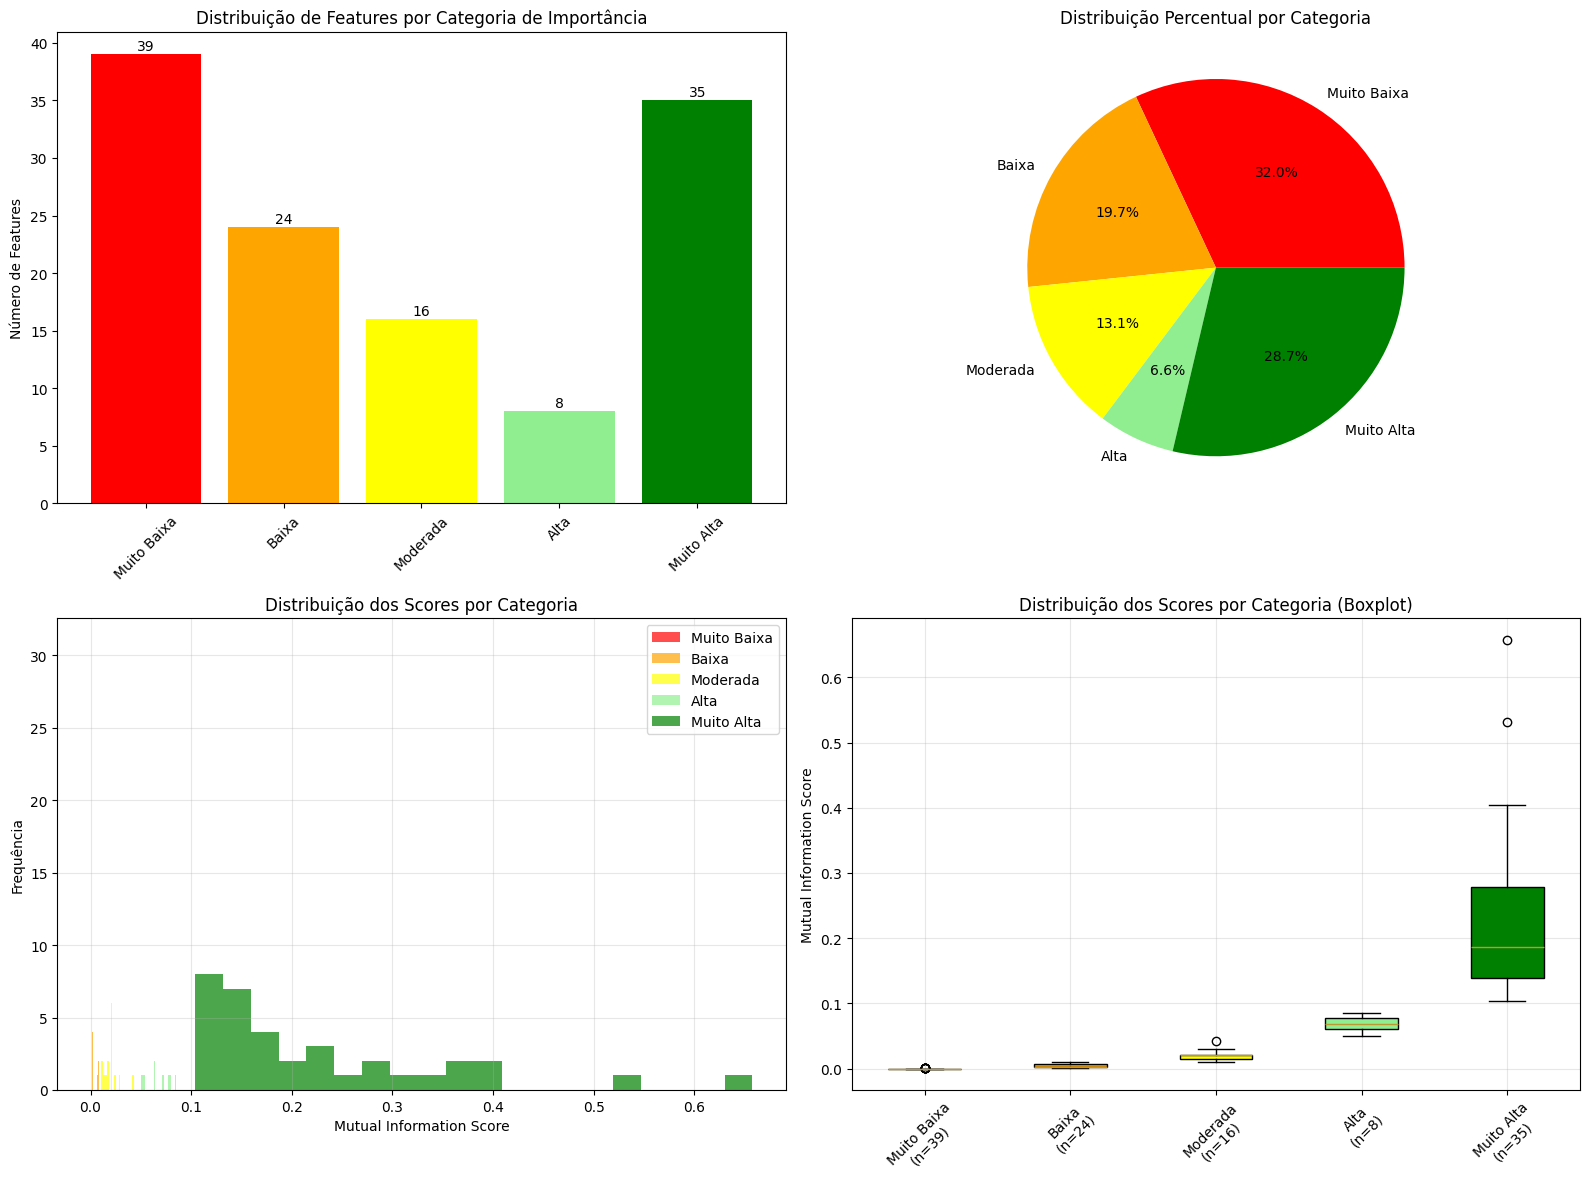

In [29]:
# Criar instância do FeatureAnalyzer com configurações iniciais
analyzer = FeatureAnalyzer()
analyzer.calcular_mutual_information(X=dataset['X_train'], y=dataset['y_train'], tipo_problema='classification')
result = analyzer.analisar_features_por_ranges()
analyzer.plotar_analise_ranges(figsize=(16, 12))



📊 Gerando visualização das top features...


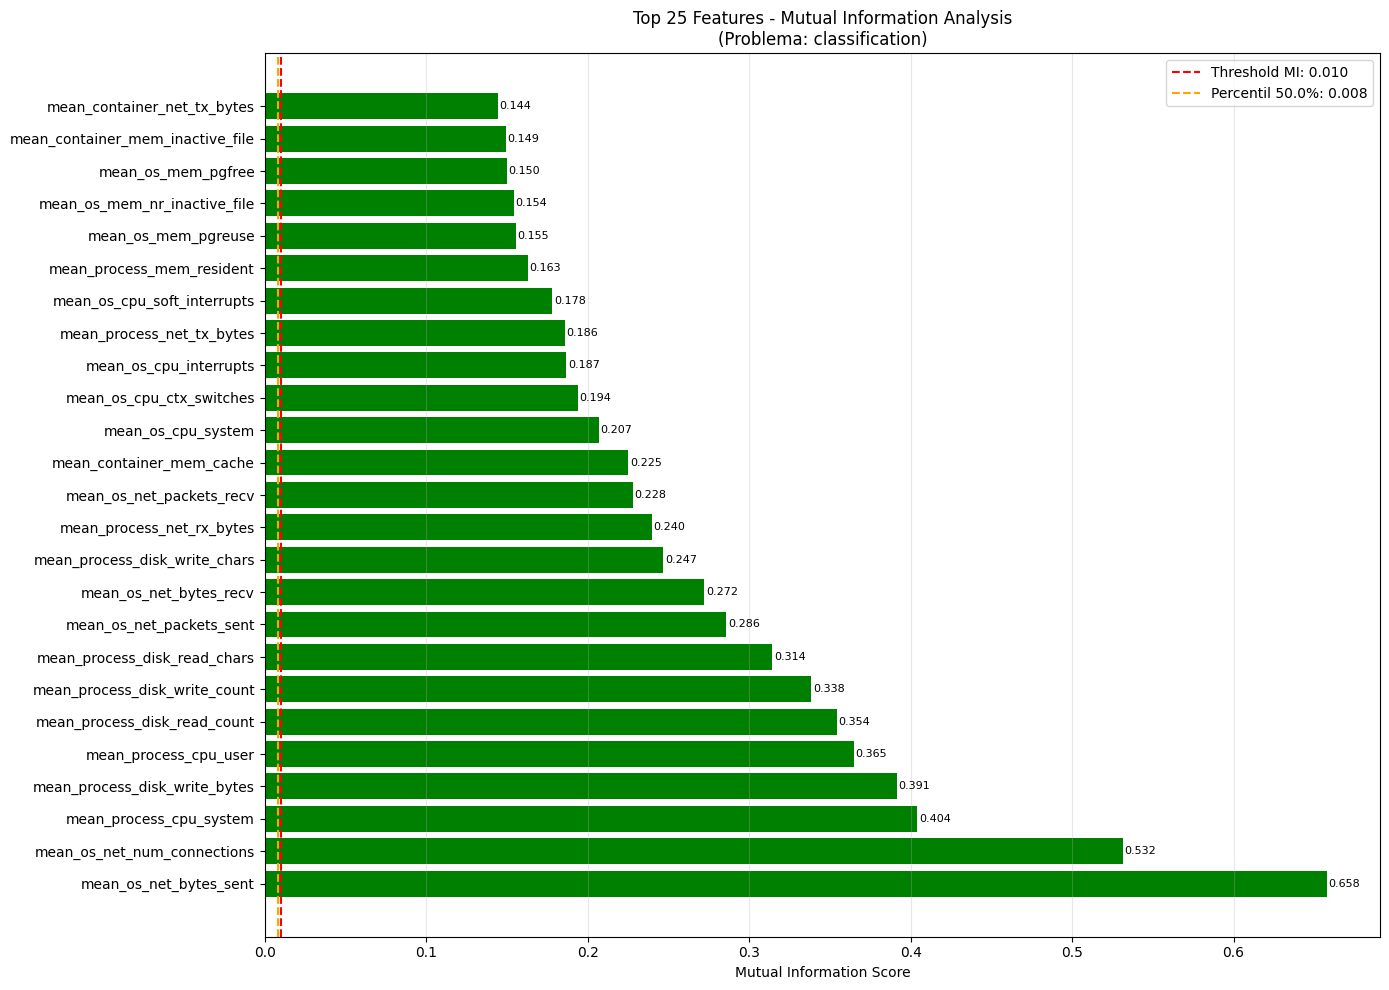

✅ Gráfico das top features gerado!


In [30]:
# Plotar gráfico de barras das top features
print("📊 Gerando visualização das top features...")

# Plotar top 25 features com mutual information
analyzer.plotar_mutual_information(top_n=25, figsize=(14, 10))

print("✅ Gráfico das top features gerado!")

In [31]:
# Relatório final e demonstração da nova funcionalidade de ranges
print("📋 RELATÓRIO FINAL - ANÁLISE COMPLETA DE FEATURES")
print("=" * 70)

# Usar o analisador já existente para demonstrar a nova funcionalidade
print("\n🎯 Nova Funcionalidade: Análise por Ranges de Importância")

# Executar análise por ranges
analyzer.imprimir_analise_ranges()

print(f"\n📊 Testando seleção por categorias:")


# Selecionar features de importância moderada ou superior
features = analyzer.selecionar_features_por_categoria(['Baixa', 'Moderada', 'Alta'])


print(f"\n✅ Análise de features por ranges implementada com sucesso!")
print(f"📈 Ranges definidos:")
print(f"   • Muito Baixa: [0.0 - 0.001)")
print(f"   • Baixa: [0.001 - 0.01)")
print(f"   • Moderada: [0.01 - 0.05)")
print(f"   • Alta: [0.05 - 0.1)")
print(f"   • Muito Alta: [0.1 - ∞)")

print(f"\n🎉 Demonstração completa finalizada!")
print("=" * 70)

📋 RELATÓRIO FINAL - ANÁLISE COMPLETA DE FEATURES

🎯 Nova Funcionalidade: Análise por Ranges de Importância

🎯 ANÁLISE DE FEATURES POR RANGES DE IMPORTÂNCIA
📊 Definição dos Ranges:
   • Muito Baixa: [0.0 - 0.001)
   • Baixa: [0.001 - 0.01)
   • Moderada: [0.01 - 0.05)
   • Alta: [0.05 - 0.1)
   • Muito Alta: [0.1 - ∞)

📈 Distribuição das Features por Categoria:

🔶 Muito Baixa:
   • Quantidade: 39 features (32.0%)
   • Range: [0.0 - 0.001)
   • Scores: 0.000000 - 0.000877
   • Média: 0.000098 (±0.000219)
   • Exemplos: mean_process_net_tx_errs, mean_container_net_rx_fifo, mean_container_disk_8:0_discard, mean_os_net_errout, mean_os_mem_nr_active_anon ...

🔶 Baixa:
   • Quantidade: 24 features (19.7%)
   • Range: [0.001 - 0.01)
   • Scores: 0.001107 - 0.009369
   • Média: 0.004204 (±0.002644)
   • Exemplos: mean_process_mem_shared, mean_process_mem_size, mean_os_disk_read_io, mean_container_disk_8:0_total, mean_os_cpu_iowait ...

🔶 Moderada:
   • Quantidade: 16 features (13.1%)
   • Range

In [33]:

dm.imprimir_informacoes()
dm.aplicar_selecao_features(features, salvar_automaticamente=True)
dm.aplicar_escalonamento(metodo='yeo-johnson', salvar_automaticamente=True)
dm.imprimir_informacoes()


📊 Informações do Dataset: svm
Nome do dataset: svm
X_train.shape: (32259, 48)
X_val.shape: (24195, 48)
X_test.shape: (24194, 48)
y_train length: 32259
y_val length: 24195
y_test length: 24194
X_train_scaled.shape: (32259, 48)
X_val_scaled.shape: (24195, 48)
X_test_scaled.shape: (24194, 48)
Features count: 48
Scaler type: PowerTransformer
Classes mapping: {'interf': np.int64(0), 'normal': np.int64(1)}
🎯 Aplicando seleção de features: 48 features
   ✅ Seleção aplicada:
   • Novo shape X_train: (32259, 48)
   • Features selecionadas: 48
✅ Dataset salvo com sucesso em ../datasets/svm.pkl
⚖️ Aplicando escalonamento: yeo-johnson
   ✅ Escalonamento 'yeo-johnson' aplicado com sucesso
   • Treino - Média antes: 94174.967 | depois: 0.000
   • Treino - Std antes: 2795694.750 | depois: 0.829
   • Validação - Média: -0.001 | Std: 0.850
   • Teste - Média: -0.002 | Std: 0.840
✅ Dataset salvo com sucesso em ../datasets/svm.pkl

📊 Informações do Dataset: svm
Nome do dataset: svm
X_train.shape: (32259